# 範例 : 計程車費率預測
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

# [作業目標]
- 使用並觀察特徵組合, 在計程車費率預測競賽的影響

# [作業重點]
- 仿造範例並參考今日課程內容, 使用經緯度一圈的長度比的概念造出新特徵, 觀察有什麼影響 (In[6], Out[6])
- 只使用上面所造的這個新特徵, 觀察有什麼影響 (In[7], Out[7])

In [1]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

data_path = 'C:/Users/user/Desktop/ML marathon/data/Feature Engineering/'
df = pd.read_csv(data_path + 'taxi_data1.csv')

train_Y = df['fare_amount']
df = df.drop(['fare_amount'] , axis=1)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [2]:
# 時間特徵分解方式:使用datetime
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [3]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df = df.drop(['pickup_datetime'] , axis=1)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(df)
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
GDBT = GradientBoostingRegressor(random_state = 42) # 設定亂數種子，這樣才不會沒有個比較基準
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.026876871475636888
Gradient Boosting Reg Score : 0.7111588287798147


In [4]:
# 增加緯度差, 經度差, 座標距離等三個特徵
df['longitude_diff'] = df['dropoff_longitude'] - df['pickup_longitude']
df['latitude_diff'] = df['dropoff_latitude'] - df['pickup_latitude']
df['distance_2D'] = (df['longitude_diff']**2 + df['latitude_diff']**2)**0.5
df[['distance_2D', 'longitude_diff', 'latitude_diff', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].head()

,distance_2D,longitude_diff,latitude_diff,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,0.009761,0.009452,-0.002437,-73.990580,40.761071,-73.981128,40.758634
1,0.018307,-0.001244,0.018265,-73.988403,40.723431,-73.989647,40.741695
2,0.008140,0.003756,-0.007222,-74.015785,40.715110,-74.012029,40.707888
3,0.021056,0.019292,-0.008437,-73.977322,40.787275,-73.958030,40.778838
4,0.032964,0.007193,0.032170,-73.989683,40.729717,-73.982490,40.761887


In [5]:
# 結果 : 準確度上升
train_X = scaler.fit_transform(df)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.027525445787303093
Gradient Boosting Reg Score : 0.8048210530983724


# 作業1
* 參考今日教材，試著使用經緯度一圈的長度比這一概念，組合出一個新特徵，再觀察原特徵加上新特徵是否提升了正確率?
> 對於線性迴歸模型，效果下降，R square值下降了 0.002；梯度提升樹模型則略增加 0.001。參考範例解釋，有一個新的發想：計程車的接客起點與終點的直線距離不一定代表實際經過的路徑長，範例提到，紐約地區河流與主要道路均為南北向，所以使得東西向的跨越往往路程比較崎嶇，繞路的情況下反而東西向會花比較多車錢。因此，還是要考慮資料位置的地理情況來判斷如何做特徵工程。

In [6]:
# 觀察該筆資料中，接送的緯度大多落在哪邊
df[['pickup_latitude', 'dropoff_latitude']].describe()

,pickup_latitude,dropoff_latitude
count,5000.000000,5000.000000
mean,39.981148,39.972626
std,5.989760,6.016378
min,-73.999735,-74.002015
25%,40.735483,40.733386
50%,40.752824,40.752687
75%,40.767127,40.767461
max,41.366138,41.366138


In [7]:
import math
"""
Your Code Here, set new character at df['distance_real']
"""
# 觀察資料緯度集中在 40.75 度附近，可以算得經度與緯度代表的長度比為 cos(40.75度) : 1 = 0.75756 : 1
# 以中位數（median）來做修正
# 'longitude_diff' 是在緯線上移動，'latitude_diff' 是在經線上移動
# 因為緯線長度會隨緯度變化，所以要將在緯線上移動的 'longitude_diff' 長度做調整

adjust_factor = (df['pickup_latitude'].median() + df['dropoff_latitude'].median()) / 2
df['distance_real'] = ((df['longitude_diff']* math.cos(adjust_factor * math.pi / 180))**2 + df['latitude_diff'] **2)**0.5

# 觀察結果 
train_X = scaler.fit_transform(df)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.025247764376875082
Gradient Boosting Reg Score : 0.8050726491142035


# 作業2
* 試著只使用新特徵估計目標值(忽略原特徵)，效果跟作業1的結果比較起來效果如何?
> 效果差了許多，代表計程車收費費率不僅與乘坐距離有關，可能還有其他因素（載客時間、載客數量）...等。

In [8]:
train_X = scaler.fit_transform(df[['distance_real']])
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.0014467577992180569
Gradient Boosting Reg Score : 0.7218144843165031


### 修正異常值
> 經、緯度是 0 的可能是缺值

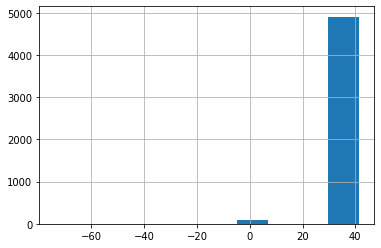

In [9]:
# 以緯度為例
df['pickup_latitude'].hist()

#### 大多接客地點為連續值，沒有重複。然而出現部分的 0，因為距離實在落差太大，判斷可能是異常值。

In [10]:
df['pickup_latitude'].value_counts()

0.000000     86
40.758915     3
40.756425     3
40.749600     3
40.747257     3
             ..
40.764638     1
40.733830     1
40.741212     1
40.639722     1
40.750767     1
Name: pickup_latitude, Length: 4749, dtype: int64

#### 以 #4227 為例，從赤道開到中緯度地區的計程車根本是不可能發生的事情，而且檢查票價並沒有因為異常的行車距離而增加

In [11]:
df[df['latitude_diff'] == df['latitude_diff'].max()]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,longitude_diff,latitude_diff,distance_2D,distance_real
4227,0.0,0.0,-73.957657,40.775978,1,2015,4,26,14,51,4,-73.957657,40.775978,84.453629,69.293051


In [12]:
train_Y[4227]

5.5

### 將異常值以中位數填補

In [13]:
import copy
df_adj = copy.deepcopy(df)
# 把所有跟經、緯度相關的特徵都進行修補
adj_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for col in adj_features:
    df_adj[col] = df_adj[col].apply(lambda x: df_adj[col].median() if x == 0 else x)

# 重新算那些特徵
df_adj['longitude_diff'] = df_adj['dropoff_longitude'] - df_adj['pickup_longitude']
df_adj['latitude_diff'] = df_adj['dropoff_latitude'] - df_adj['pickup_latitude']
df_adj['distance_2D'] = (df_adj['longitude_diff']**2 + df_adj['latitude_diff']**2)**0.5
adjust_factor = (df_adj['pickup_latitude'].median() + df_adj['dropoff_latitude'].median()) / 2
df_adj['distance_real'] = ((df_adj['longitude_diff']* math.cos(adjust_factor * math.pi / 180))**2 + df_adj['latitude_diff']**2)**0.5

### 效果十分顯著！

In [14]:
# 觀察結果 
train_X = scaler.fit_transform(df_adj)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.7586467043920722
Gradient Boosting Reg Score : 0.8096788686867106
